# Outliner

###### Detect
 - Maximum & Minimum values
 - Percentile
 - Mean & standard deviation
 - Inter Qualities Range

###### Eliminate
 - Trimming
 - Capping

## 1. Using maximum and minimum values

In [1]:
# Import data
import pandas as pd
df = pd.read_excel('dataset.xlsx', sheet_name='outliner')

In [2]:
df

,ID,salary
0,1001,21652
1,1002,20007
2,1003,29464
3,1004,25998
4,1005,21565
5,1006,57801
6,1007,60100
7,1008,29361
8,1009,27654
9,1010,23086


In [3]:
df.describe()

,ID,salary
count,30.000000,30.000000
mean,1015.500000,26609.800000
std,8.803408,9994.181705
min,1001.000000,4780.000000
25%,1008.250000,22031.750000
50%,1015.500000,25420.000000
75%,1022.750000,28215.750000
max,1030.000000,60100.000000


<AxesSubplot: >

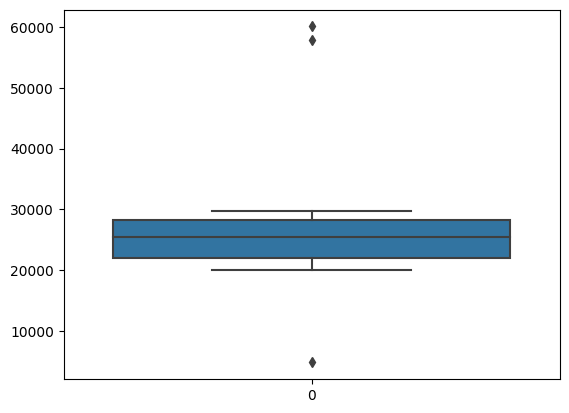

In [4]:
import seaborn as sns
sns.boxplot(df['salary'])

C:\Users\ratta\AppData\Local\Temp\ipykernel_6512\118205992.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['salary'])


<AxesSubplot: xlabel='salary', ylabel='Density'>

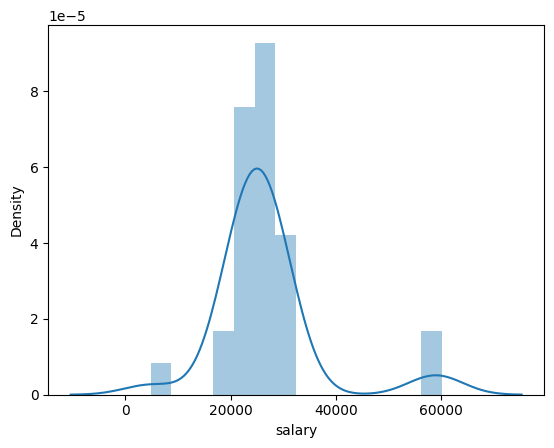

In [5]:
sns.distplot(df['salary'])

### Find boundary for outliner

In [6]:
import numpy as np
lower_limit = np.sort(df['salary'].values)[1]
upper_limit = np.sort(df['salary'].values)[-2]

In [16]:
# 0 1 2 3 ... 199 200 201 202
np.sort(df['salary'].values)

array([ 4780, 20007, 20167, 21144, 21464, 21565, 21652, 21986, 22169,
       23010, 23036, 23086, 25092, 25259, 25366, 25474, 25931, 25998,
       26183, 26575, 26780, 27654, 28403, 29361, 29365, 29464, 29674,
       29748, 57801, 60100], dtype=int64)

In [17]:
lower_limit

20007

In [18]:
upper_limit

57801

### Trimming the outliner values

In [20]:
df_trim = df.loc[df['salary'] >= lower_limit]
df_trim

,ID,salary
0,1001,21652
1,1002,20007
2,1003,29464
3,1004,25998
4,1005,21565
5,1006,57801
6,1007,60100
7,1008,29361
8,1009,27654
9,1010,23086


In [21]:
df.describe()

,ID,salary
count,30.000000,30.000000
mean,1015.500000,26609.800000
std,8.803408,9994.181705
min,1001.000000,4780.000000
25%,1008.250000,22031.750000
50%,1015.500000,25420.000000
75%,1022.750000,28215.750000
max,1030.000000,60100.000000


In [22]:
df_trim.describe()

,ID,salary
count,29.000000,29.000000
mean,1015.034483,27362.551724
std,8.575225,9265.245705
min,1001.000000,20007.000000
25%,1008.000000,22169.000000
50%,1015.000000,25474.000000
75%,1022.000000,28403.000000
max,1030.000000,60100.000000


In [24]:
df_trim = df_trim.loc[df_trim['salary'] <= upper_limit]
df_trim

,ID,salary
0,1001,21652
1,1002,20007
2,1003,29464
3,1004,25998
4,1005,21565
5,1006,57801
7,1008,29361
8,1009,27654
9,1010,23086
10,1011,26780


In [25]:
df_trim.describe()

,ID,salary
count,28.000000,28.000000
mean,1015.321429,26193.357143
std,8.589630,6921.883752
min,1001.000000,20007.000000
25%,1008.750000,22123.250000
50%,1015.500000,25420.000000
75%,1022.250000,27841.250000
max,1030.000000,57801.000000


In [ ]:
# Option : use only one command
# df_trim = df[(df['salary'] <= upper_limit) & (df['salary'] >= lower_limit)]

In [ ]:
sns.boxplot(df['salary'])

In [ ]:
sns.boxplot(df_trim['salary'])

In [ ]:
sns.distplot(df_trim['salary'])

### Clipping the outliner values

In [ ]:
df_clip = df.copy()

In [ ]:
df_clip['salary'] = df['salary'].replace( df['salary'].min() , lower_limit)

In [ ]:
df_clip.describe()

In [ ]:
df_clip['salary'] = df_clip['salary'].replace( df_clip['salary'].max() , upper_limit)

In [ ]:
df_clip.describe()

In [ ]:
sns.boxplot(df_clip['salary'])

In [ ]:
sns.distplot(df_clip['salary'])

## 2. Using percentile

In [ ]:
import pandas as pd
df = pd.read_excel('dataset.xlsx', sheet_name='outliner')

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
import seaborn as sns
sns.boxplot(df['salary'])

In [ ]:
sns.distplot(df['salary'])

### Find boundary for outliner

In [ ]:
upper_limit = df['salary'].quantile(0.99)
lower_limit = df['salary'].quantile(0.01)

In [ ]:
upper_limit

In [ ]:
lower_limit

### Trimming the outliner values

In [ ]:
df_trim = df[(df['salary'] <= upper_limit) & (df['salary'] >= lower_limit)]

In [ ]:
df_trim.describe()

In [ ]:
sns.boxplot(df_trim['salary'])

In [ ]:
sns.distplot(df_trim['salary'])

### Clipping the outliner values

In [ ]:
df_clip = df.copy()

In [ ]:
df_clip['salary'] = df['salary'].replace( df['salary'].loc[df['salary'] < lower_limit] , lower_limit)

In [ ]:
df_clip.describe()

In [ ]:
df_clip['salary'] = df_clip['salary'].replace( df_clip['salary'].loc[df_clip['salary'] > upper_limit] , upper_limit)

In [ ]:
df_clip.describe()

In [ ]:
sns.boxplot(df['salary'])

In [ ]:
sns.boxplot(df_clip['salary'])

In [ ]:
sns.distplot(df_clip['salary'])

### Change the boundary to the 10th percentile

In [ ]:
upper_limit = df['salary'].quantile(0.90)
lower_limit = df['salary'].quantile(0.10)

In [ ]:
upper_limit

In [ ]:
lower_limit

In [ ]:
df_trim = df[(df['salary'] <= upper_limit) & (df['salary'] >= lower_limit)]

In [ ]:
df_trim.describe()

In [ ]:
sns.boxplot(df_trim['salary'])

In [ ]:
sns.distplot(df_trim['salary'])

## 3. Using the Inter-Quantile Range (IQR)

In [ ]:
import pandas as pd
df = pd.read_excel('dataset.xlsx', sheet_name='outliner')

In [ ]:
df.describe()

In [ ]:
import seaborn as sns
sns.boxplot(df['salary'])

In [ ]:
sns.distplot(df['salary'])

### Find boundary for outliner

In [ ]:
q1 = df['salary'].quantile(0.25)
q3 = df['salary'].quantile(0.75)
iqr = q3-q1

In [ ]:
upper_limit = q3 + ( 1.5 * iqr )
lower_limit = q1 - ( 1.5 * iqr )

In [ ]:
upper_limit

In [ ]:
lower_limit

### Trimming the outliner values

In [ ]:
df_trim = df[(df['salary'] <= upper_limit) & (df['salary'] >= lower_limit)]

In [ ]:
df_trim.describe()

In [ ]:
sns.boxplot(df_trim['salary'])

In [ ]:
sns.distplot(df_trim['salary'])

### Clipping the outliner values

In [ ]:
df_clip = df.copy()

In [ ]:
df_clip['salary'] = df['salary'].replace( df['salary'].loc[df['salary'] < lower_limit] , lower_limit)

In [ ]:
df_clip.describe()

In [ ]:
df_clip['salary'] = df_clip['salary'].replace( df_clip['salary'].loc[df_clip['salary'] > upper_limit] , upper_limit)

In [ ]:
df_clip.describe()

In [ ]:
sns.boxplot(df_clip['salary'])

In [ ]:
sns.distplot(df_clip['salary'])

### Another function for clipping the outliner values

In [ ]:
import numpy as np
df_clip['salary'] = np.where( df['salary'] >= upper_limit,
                                  upper_limit,
                                  np.where(df['salary'] <= lower_limit,
                                               lower_limit,
                                               df['salary'] ) )

In [ ]:
df_clip.describe()

In [ ]:
sns.boxplot(df_clip['salary'])

In [ ]:
sns.distplot(df_clip['salary'])